In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.validation.images.shape

(5000, 784)

In [7]:
train_x,train_y=mnist.train.next_batch(20000)

In [11]:
train_y#One_Hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
test_x,test_y=mnist.test.next_batch(5000)

### 图像的可视化

In [13]:
import matplotlib.pyplot as plt

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


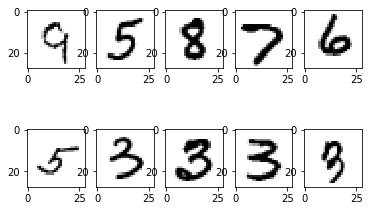

In [14]:
plt.rc('image',cmap='binary')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28))
    print(train_y[i])
    
    

### 全连接神经网络

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
def model1():
    model=Sequential()
    model.add(Dense(784,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [21]:
m=model1()

In [22]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [36]:
history=m.fit(train_x,train_y,epochs=2,batch_size=32)

Epoch 1/2
20000/20000 [==============================] - 3s 152us/step - loss: 0.0310
Epoch 2/2
20000/20000 [==============================] - 3s 149us/step - loss: 0.0308


In [37]:
pred=m.predict(test_x)

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.952

In [41]:
from keras.layers import Conv2D,MaxPool2D,Flatten

当前的所有input是784*1的，如果使用卷积神经网络需要进行resize

In [43]:
X_train_img=train_x.reshape(train_x.shape[0],28,28,1)

In [44]:
X_test_img=test_x.reshape(test_x.shape[0],28,28,1)

In [47]:
def model2():
    model=Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D())
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    return model

In [48]:
m=model2()

In [49]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [53]:
history=m.fit(X_train_img,train_y,epochs=2,batch_size=32)

Epoch 1/2
20000/20000 [==============================] - 10s 522us/step - loss: 0.2597
Epoch 2/2
20000/20000 [==============================] - 13s 631us/step - loss: 0.0810


In [54]:
pred=m.predict(X_test_img)

In [55]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.977